## 1. Problem Statement
- Customer Personality Analysis is the analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments

## 2. Import data and necessary libaries

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import missingno as msno
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans 

In [72]:
data = pd.read_csv('marketing_campaign.csv',sep='\t' )
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [73]:
data_original = data.copy()

## 3. Basic EDA

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

- Missingness

In [75]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


- Need for scaling
- Presence of outliers 

In [88]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age',
       'Customer_Days'],
      dtype='object')

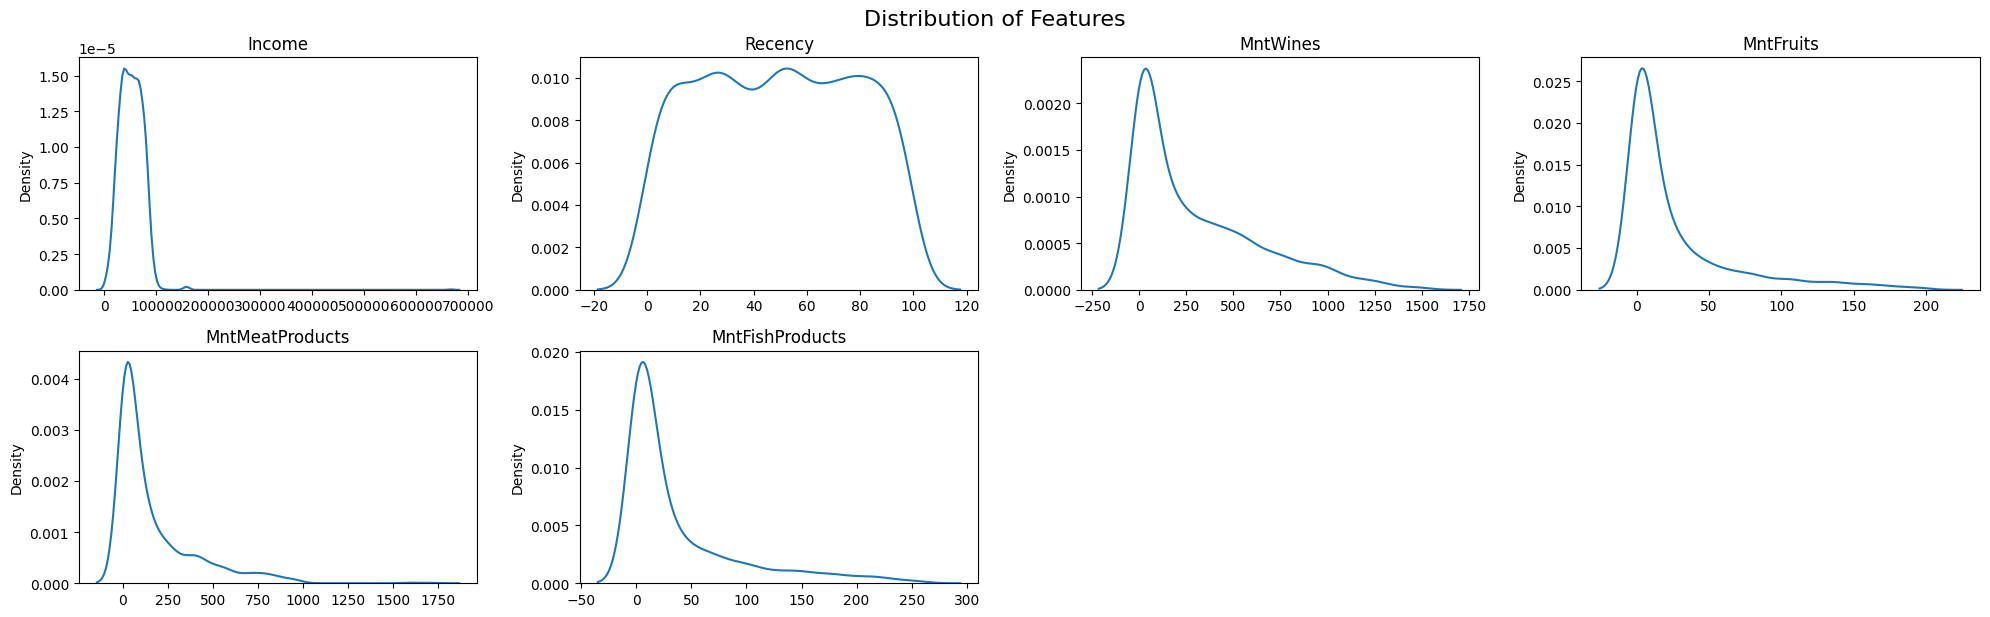

In [89]:
#Distribution 
columns = ['Income','Recency', 'MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts']

# Create subplots
fig, axes = plt.subplots(4, 4, figsize=(20, 12))
fig.suptitle('Distribution of Features', fontsize=16)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot each feature
for i, column in enumerate(columns):
    sns.kdeplot(data=data, x=column, ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('')

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## 4. Data Preprocessing

#### 4.1 Handling Missingness

In [76]:
data.isnull().mean()*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

In [78]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

<Axes: >

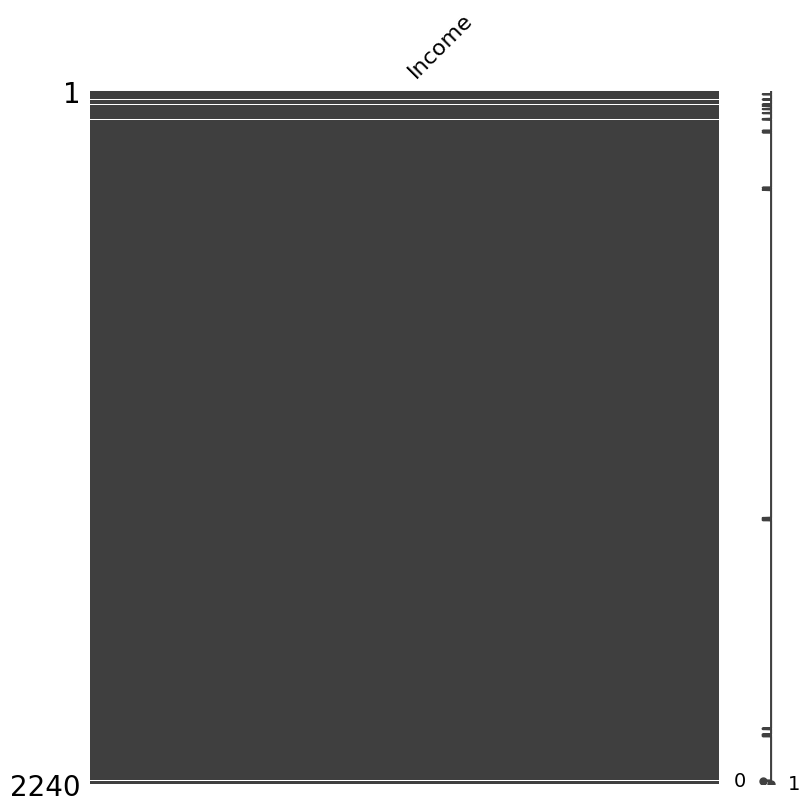

In [79]:
#Explore the missingness
msno.matrix(data[['Income']], figsize=(9,9))

- Since the type of missingness in the 'Income' column is missing not at random (MNAR) - KNN imputer is used to handle the missingness.

In [80]:
imputer = KNNImputer()
data['Income'] = imputer.fit_transform(data[['Income']])

#### 4.2 Featue Engineering

In [81]:
# Convert Year_birth to Age
current_year = datetime.now().year
data['Age'] = current_year - data['Year_Birth']

In [82]:
# Convert Dt_Customer to days since enrollment
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')
data['Customer_Days'] = (datetime.now() - data['Dt_Customer']).dt.days

In [83]:
# Drop unnecessary column
data.drop(['ID', 'Year_Birth', 'Dt_Customer'], axis=1, inplace=True)

#### 4.3 Encoding

In [84]:
data[['Education', 'Marital_Status']].nunique()

Education         5
Marital_Status    8
dtype: int64

In [85]:
print(data['Education'].unique())
print(data['Marital_Status'].unique())

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [117]:
#Onehot Encoding
onehot = OneHotEncoder(handle_unknown='ignore')
features_onehot = onehot.fit_transform(data[['Education', 'Marital_Status']])

# Create the one-hot encoded dataframe
column_names = onehot.get_feature_names_out(['Education', 'Marital_Status'])
features_onehot_df = pd.DataFrame(features_onehot.toarray(), columns=column_names, index=data.index)

 # Combine encoded features with the remaining numerical features
data_encoded = pd.concat([data.drop(['Education', 'Marital_Status'], axis=1), features_onehot_df], axis=1)

### 4.4 Feature Scaling

- A robust scaler is used since most of the features have a sweked distribution.

In [118]:
#Scale the data
scaler = RobustScaler()
data_scaled = scaler.fit_transform(data_encoded)

## 5. K-means Clustering

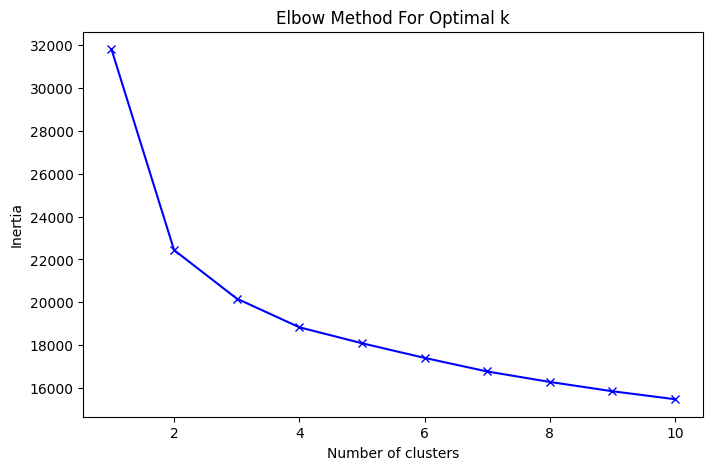

In [119]:
# Determine the optimal number of clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, n_init=12, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


In [120]:
# Training the K-means Model
k_means = KMeans(n_clusters=2, random_state=42)
k_means.fit(data_scaled)

KMeans(n_clusters=2, random_state=42)

In [121]:
labels = k_means.labels_
print(labels)

[1 0 1 ... 0 1 0]


In [122]:
# Create a new DataFrame with the cluster labels
clustered_data = pd.DataFrame(data_encoded)
clustered_data['Cluster'] = labels
clustered_data.head(5)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Cluster
0,58138.0,0,0,58,635,88,546,172,88,88,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
1,46344.0,1,1,38,11,1,6,2,1,6,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,26646.0,1,0,26,11,4,20,10,3,5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


### Analyzing and Visualizing the Clusters

In [123]:
clustered_data.groupby('Cluster').mean()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
Cluster,,,,,,,,,,,,,,,,,,,,,
0,41734.154690,0.624668,0.595491,48.937666,168.257958,7.574271,49.241379,10.420424,7.378647,26.769231,...,0.177719,0.224801,0.000000,0.001989,0.105438,0.391910,0.211538,0.257958,0.029841,0.001326
1,73905.379453,0.072404,0.322404,49.463115,583.446721,64.883880,409.442623,93.364754,67.614754,79.564208,...,0.139344,0.200820,0.002732,0.000000,0.099727,0.372951,0.219945,0.260929,0.043716,0.000000


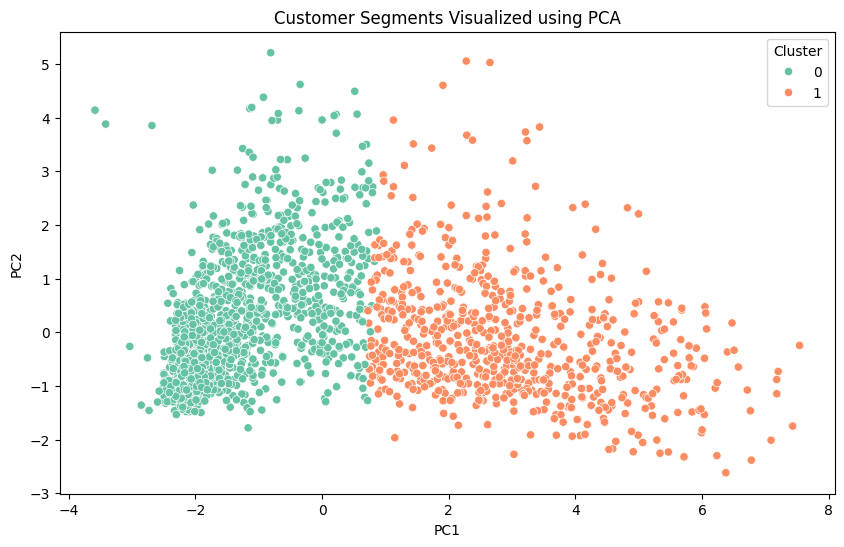

In [124]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_scaled)

# Create a DataFrame for visualization
pca_df = pd.DataFrame(data=reduced_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = labels  # Use the cluster labels obtained from K-means

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set2')
plt.title('Customer Segments Visualized using PCA')
plt.show()


Step 4: Interpretation and Recommendations
Based on the cluster profiles, you can make data-driven marketing recommendations for each customer segment.

